In [1]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp

# pre-processing
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# session module version
session_info.show()

In [3]:
# reading dataset
data = pd.read_csv("train.csv", sep=';')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Cleaning

### Handle Missing Values
from descriptive statistics shown that there are 4 column contain missing-values but not in form of null-values, however in form of value of 'unknown' & 'other' in 4 column named: *job, education, contact, poutcome*. ```poutcome``` are variable that having the most unknown value which consist of more than its 50% data, the best decision taken is to just take out and not use the variables..

#### Job Variable

In [5]:
# Handling missing values in job column using frequent values replacing method

data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
count,9732,9458,7597,5171,4154,2264,1579,1487,1303,1240,938,288


In [6]:
# replacing the unknown values using the most values containing column (mode) which 'blue-collar'

data.job.replace(to_replace='unknown', value=data.job.mode()[0], inplace=True)
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student
count,10020,9458,7597,5171,4154,2264,1579,1487,1303,1240,938


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Education Variable

In [7]:
# Handling missing values in education column using frequent values replacing method

data.education.value_counts().to_frame().T

education,secondary,tertiary,primary,unknown
count,23202,13301,6851,1857


In [8]:
data.education.replace(to_replace='unknown', value=data.education.mode()[0], inplace=True)
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary
count,25059,13301,6851


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Contact Variable

In [9]:
# Handling missing values in contact column using frequent values replacing method

data.contact.value_counts().to_frame().T

contact,cellular,unknown,telephone
count,29285,13020,2906


In [10]:
data.contact.replace(to_replace='unknown', value=data.contact.mode()[0], inplace=True)
data.contact.value_counts().to_frame().T

contact,cellular,telephone
count,42305,2906


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Poutcome Variable

In [11]:
# handling the coloumn value named 'other' and change it to its mode value

data.poutcome.value_counts().to_frame().T

poutcome,unknown,failure,other,success
count,36959,4901,1840,1511


In [12]:
# droping the column

data.drop(['poutcome'], axis=1, inplace=True)

# checking the column available after dropping for confirmation
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

Dengan pengecekan diatas didapatkan bahwa variabel ```poutcome``` telah dihapus

### Handle Duplicated Data
from the previous stage, shown that there are no duplication in dataset analyse from all column, so in this section there are no treatment needed to be done

In [13]:
# checking overall

data.duplicated().sum()

0

In [14]:
# checking for subset

data.duplicated(subset=['age','balance','day','campaign']).sum()

1332

There are no duplication shown from the dataset analyse from all the column which shown there are no redundant data record in dataset

### Handle Outliers
from previous stage, known there are 6 numerical variables having outliers named.
> age, balance, duration, campaign, pdays, previous

from the 6 numerical variables decided for ```pdays & previous``` to be turned into categorical variables since its more fitting for its characteristic more than its own nature as numerical. The two having 0.99 correlation also making it redundant and will just picked one out of the two.

From its description 4 of variables that need outlier handling in this section are.
> **age, balance, duration, campaign**

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [16]:
# numerical setelah feature selection
numerical = ['age','balance','duration','campaign']

#### Handling Balance False Outlier 1st steps

In [17]:
# customer with negative balance but saying yes to promotion,
# we want to build system discriminative to negative balance customer so its categorize as false outlier and dropped

data.query("balance < 0 & y=='yes'").y.count()

210

In [18]:
data = data.drop(data.query("balance < 0 & y=='yes'").index)

In [19]:
# checking when its dropped already or not

data.query("balance < 0 & y=='yes'").y.count()

0

From the process below shown the false outlier from the definition has already dropped

In [20]:
data_num = data[numerical]
data_num.head()

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1


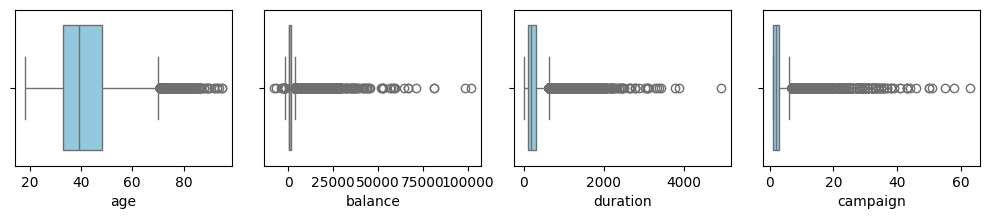

In [21]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

#### Defining function to handle the outlier

In [22]:
def iqr_treshold(variable):
    Q1 = data[variable].quantile(.25)
    Q3 = data[variable].quantile(.75)

    IQR = Q3-Q1

    min_tresh = Q1 - (1.5*IQR)
    max_tresh = Q1 + (1.5*IQR)
    
    return min_tresh, max_tresh

In [23]:
def iqr_normalize(variable):
    normal = ((data[variable] >= iqr_treshold(variable)[0]) & 
                (data[variable] <= iqr_treshold(variable)[1]))
    data['outlier_label'] = normal

#### Normalizing outlier in age variable

In [24]:
outlier = iqr_treshold("age")
print('''Umur yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Umur yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari 10.5
         Nilai yang lebih dari 55.5


In [25]:
iqr_normalize("age")
outlier_age = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable age adalah sejumlah '''+str(outlier_age))

Jumlah outlier yang ada pada variable age adalah sejumlah 4887


In [26]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

#### Normalizing outlier in campaign variable

In [27]:
outlier = iqr_treshold("campaign")
print('''Jumlah Campaign yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Jumlah Campaign yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari -2.0
         Nilai yang lebih dari 4.0


In [28]:
iqr_normalize("campaign")
outlier_campaign = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable cammpaign adalah sejumlah '''+str(outlier_campaign))

Jumlah outlier yang ada pada variable cammpaign adalah sejumlah 5473


In [29]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

#### Normalizing outlier in balance variable

In [30]:
outlier = iqr_treshold("balance")
print('''Jumlah balance yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Jumlah balance yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari -1858.5
         Nilai yang lebih dari 2008.5


In [31]:
iqr_normalize("balance")
outlier_balance = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable cammpaign adalah sejumlah '''+str(outlier_balance))

Jumlah outlier yang ada pada variable cammpaign adalah sejumlah 6186


In [32]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

#### Normalizing outlier in duration variable

In [33]:
outlier = iqr_treshold("duration")
print('''Jumlah duration dalam detik yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Jumlah duration dalam detik yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari -206.0
         Nilai yang lebih dari 424.0


In [34]:
iqr_normalize("duration")
outlier_duration = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable cammpaign adalah sejumlah '''+str(outlier_duration))

Jumlah outlier yang ada pada variable cammpaign adalah sejumlah 4358


In [35]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

In [36]:
# Counting outlier coloumn dropped

jumlah_outlier = outlier_age + outlier_balance + outlier_campaign + outlier_duration
print('''Jumlah column dropped dari outlier adalah sejumlah '''+str(jumlah_outlier))

Jumlah column dropped dari outlier adalah sejumlah 20904


#### boxplot after normalize

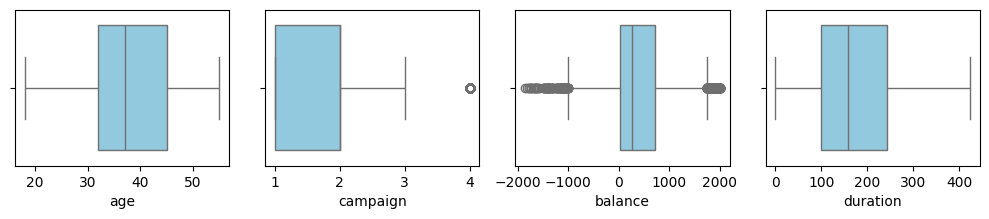

In [37]:
feature = ['age','campaign','balance','duration']

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

In [38]:
data.drop(['outlier_label'], axis=1, inplace=True)

In [39]:
# its central tendency info after outlier handing using IQR
data[numerical].describe()

,age,balance,duration,campaign
count,24097.000000,24097.000000,24097.000000,24097.000000
mean,38.257459,426.783334,176.935096,1.877661
std,8.256679,557.847780,99.421264,0.974384
min,18.000000,-1854.000000,0.000000,1.000000
25%,32.000000,25.000000,99.000000,1.000000
50%,37.000000,273.000000,159.000000,2.000000
75%,45.000000,712.000000,243.000000,2.000000
max,55.000000,2008.000000,424.000000,4.000000


### Feature Extraction

In [40]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no


#### Transforming ```previous``` variable into categorical so its usable

In [41]:
data.query("previous > 0").y.count()

4532

In [42]:
data.previous = np.where(data.previous == 0, 0, 1)

In [43]:
data.previous.value_counts()

previous
0    19565
1     4532
Name: count, dtype: int64

## Feature Engineering

### Feature Selection
Feature used in modelling are.
> age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, previous

Classification label
> y

In [44]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no


In [45]:
data.drop(['pdays'], axis=1, inplace=True)

In [46]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no


### Feature Encoding

In [47]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no


In [48]:
# after feature selection
category = ['job','marital','education','default','housing','loan','contact','month','y']
cat_ordinal = ['education','default','housing','loan','month','y']
cat_nominal = ['job','contact', 'marital']

#### label encoder categorical to numerical

In [49]:
mapping_month = {
    'jan' : 0,
    'feb' : 1,
    'mar' : 2,
    'apr' : 3,
    'may' : 4,
    'jun' : 5,
    'jul' : 6,
    'aug' : 7,
    'sep' : 8,
    'oct' : 9,
    'nov' : 10,
    'dec' : 11
}

data['month'] = data['month'].map(mapping_month)

In [50]:
mapping_education = {
    'primary'   : 0,
    'secondary' : 1, 
    'tertiary'  :2
}

data['education'] = data['education'].map(mapping_education)

In [51]:
mapping_default = {
    'yes' : 1,
    'no'  : 0
}

data['default'] = data['default'].map(mapping_default)

In [52]:
mapping_housing = {
    'yes' : 1,
    'no'  : 0
}

data['housing'] = data['housing'].map(mapping_housing)

In [53]:
mapping_loan = {
    'yes' : 1,
    'no'  : 0
}

data['loan'] = data['loan'].map(mapping_loan)

In [54]:
mapping_y = {
    'yes' : 1,
    'no'  : 0
}

data['y'] = data['y'].map(mapping_y)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24097 entries, 1 to 45205
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        24097 non-null  int64 
 1   job        24097 non-null  object
 2   marital    24097 non-null  object
 3   education  24097 non-null  int64 
 4   default    24097 non-null  int64 
 5   balance    24097 non-null  int64 
 6   housing    24097 non-null  int64 
 7   loan       24097 non-null  int64 
 8   contact    24097 non-null  object
 9   day        24097 non-null  int64 
 10  month      24097 non-null  int64 
 11  duration   24097 non-null  int64 
 12  campaign   24097 non-null  int64 
 13  previous   24097 non-null  int64 
 14  y          24097 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 2.9+ MB


#### OHE categorical to numerical

In [56]:
data.reset_index(drop=True, inplace=True)

In [57]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
24092,37,management,married,2,0,1428,0,0,cellular,16,10,333,2,0,0
24093,53,management,married,2,0,583,0,0,cellular,17,10,226,1,1,1
24094,34,admin.,single,1,0,557,0,0,cellular,17,10,224,1,0,1
24095,23,student,single,2,0,113,0,0,cellular,17,10,266,1,0,1
24096,25,technician,single,1,0,505,0,1,cellular,17,10,386,2,0,1


##### Contact

In [58]:
data.contact.value_counts()

contact
cellular     23022
telephone     1075
Name: count, dtype: int64

In [59]:
contact_ohe = pd.get_dummies(data['contact'],prefix='contact', dtype=int)
data = data.join(contact_ohe)

##### Marital

In [60]:
data.marital.value_counts()

marital
married     13821
single       7585
divorced     2691
Name: count, dtype: int64

In [61]:
marital_ohe = pd.get_dummies(data['marital'],prefix='marital', dtype=int)
data = data.join(marital_ohe)

##### Job

In [62]:
data.job.value_counts()

job
blue-collar      5662
management       4766
technician       4312
admin.           3120
services         2518
self-employed     834
entrepreneur      782
unemployed        677
student           580
housemaid         574
retired           272
Name: count, dtype: int64

In [63]:
job_ohe = pd.get_dummies(data['job'],prefix='job', dtype=int)
data = data.join(job_ohe)

In [64]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'y', 'contact_cellular', 'contact_telephone', 'marital_divorced',
       'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

In [68]:
data.drop(['job','marital','contact'], axis=1, inplace=True)

In [69]:
data.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous', 'y', 'contact_cellular', 'contact_telephone', 'marital_divorced', 'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed'], dtype='object')

### Feature Transformation 

In [70]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,44,1,0,29,1,0,5,4,151,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,33,1,0,2,1,1,5,4,76,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,47,1,0,1506,1,0,5,4,92,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,33,1,0,1,0,0,5,4,198,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,35,2,0,231,1,0,5,4,139,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24097 entries, 0 to 24096
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                24097 non-null  int64
 1   education          24097 non-null  int64
 2   default            24097 non-null  int64
 3   balance            24097 non-null  int64
 4   housing            24097 non-null  int64
 5   loan               24097 non-null  int64
 6   day                24097 non-null  int64
 7   month              24097 non-null  int64
 8   duration           24097 non-null  int64
 9   campaign           24097 non-null  int64
 10  previous           24097 non-null  int64
 11  y                  24097 non-null  int64
 12  contact_cellular   24097 non-null  int64
 13  contact_telephone  24097 non-null  int64
 14  marital_divorced   24097 non-null  int64
 15  marital_married    24097 non-null  int64
 16  marital_single     24097 non-null  int64
 17  job_admin.  

In [72]:
data[numerical].columns

Index(['age', 'balance', 'duration', 'campaign'], dtype='object')

In [73]:
# numerical scalling
data.loc[:,['age']] = StandardScaler().fit_transform(data['age'].values.reshape(len(data),1))
data.loc[:,['campaign']] = StandardScaler().fit_transform(data['campaign'].values.reshape(len(data),1))
data.loc[:,['balance']] = StandardScaler().fit_transform(data['balance'].values.reshape(len(data),1))
data.loc[:,['duration']] = StandardScaler().fit_transform(data['duration'].values.reshape(len(data),1))
data.loc[:,['day']] = StandardScaler().fit_transform(data['age'].values.reshape(len(data),1))

In [77]:
cat_ordinal

['education', 'default', 'housing', 'loan', 'month', 'y']

In [78]:
# categorical ordinal more than 2 value scalling
data.loc[:,['education']] = StandardScaler().fit_transform(data['education'].values.reshape(len(data),1))
data.loc[:,['month']] = StandardScaler().fit_transform(data['month'].values.reshape(len(data),1))

In [79]:
data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0.695517,-0.232452,0,-0.713083,1,0,0.695517,-0.401396,-0.260866,-0.900753,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-0.636765,-0.232452,0,-0.761484,1,1,-0.636765,-0.401396,-1.015248,-0.900753,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1.058867,-0.232452,0,1.934648,1,0,1.058867,-0.401396,-0.854313,-0.900753,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.636765,-0.232452,0,-0.763277,0,0,-0.636765,-0.401396,0.211880,-0.900753,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,-0.394532,1.353897,0,-0.350969,1,0,-0.394532,-0.401396,-0.381567,-0.900753,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [80]:
data.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,2.409700e+04,2.409700e+04,24097.000000,2.409700e+04,24097.000000,24097.000000,2.409700e+04,2.409700e+04,2.409700e+04,2.409700e+04,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000,24097.000000
mean,-2.925088e-16,-1.509723e-16,0.021704,-3.774307e-17,0.604930,0.177449,-9.435767e-18,-1.321007e-16,4.010201e-17,-8.492190e-17,0.188073,0.060547,0.955389,0.044611,0.111674,0.573557,0.314769,0.129477,0.234967,0.032452,0.023820,0.197784,0.011288,0.034610,0.104494,0.024069,0.178943,0.028095
std,1.000021e+00,1.000021e+00,0.145718,1.000021e+00,0.488876,0.382057,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,0.390779,0.238502,0.206453,0.206453,0.314971,0.494570,0.464434,0.335734,0.423987,0.177201,0.152492,0.398337,0.105645,0.182794,0.305907,0.153268,0.383313,0.165247
min,-2.453514e+00,-1.818801e+00,0.000000,-4.088626e+00,0.000000,0.000000,-2.453514e+00,-2.087957e+00,-1.779687e+00,-9.007526e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.578821e-01,-2.324521e-01,0.000000,-7.202532e-01,0.000000,0.000000,-7.578821e-01,-4.013956e-01,-7.839039e-01,-9.007526e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.522992e-01,-2.324521e-01,0.000000,-2.756783e-01,1.000000,0.000000,-1.522992e-01,-4.013956e-01,-1.803987e-01,1.255577e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.166334e-01,1.353897e+00,0.000000,5.112911e-01,1.000000,0.000000,8.166334e-01,4.418852e-01,6.645085e-01,1.255577e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.027799e+00,1.353897e+00,1.000000,2.834554e+00,1.000000,1.000000,2.027799e+00,2.550087e+00,2.485082e+00,2.178178e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
